TO TRY:
-no pruning -> seems bad
-track loss relative to graph size (divide by number of nodes)
-track min / max single loss node -> do values significantly change after aggregate loss flattens out
-sample uniformly around the sphere to initialize
-test small graph to verify -> seems good
-connect nodes via levenstein now that we're using a sphere
-use sentiment analysis on templates to populate edge weights
-use raw_answer -> seems better
-use only targets where to_node and raw_answer match (only entity targets)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import pandas as pd

import msg_passing
import utils
import run
import display

In [9]:
#hist, diagnostic_hist, g = run.test4()

def load_stuff():
    fname = "output/gun_regulations_v2_raw_answer_50K_lr_3_dim_10"
    g = msg_passing.load_graph_graphml(fname + ".graphml")
    hist, diagnostic_hist = msg_passing.load_history(fname + ".pkl")
    return hist, diagnostic_hist, g

hist, diagnostic_hist, g = load_stuff()

In [25]:
test_g = nx.MultiGraph()
test_g.add_edge("a", "b", weight=1)
test_g.add_edge("a", "c", weight=-1)
msg_passing.initialize_node_values(test_g, 1, 0.01, size=2)
hist = {"a": [], "b": [], "c": []}
hist, diagnostic_hist = msg_passing.pass_messages(test_g, 10**-3, 10**-3, 10000, save_period=1, history=hist, use_heat=False)


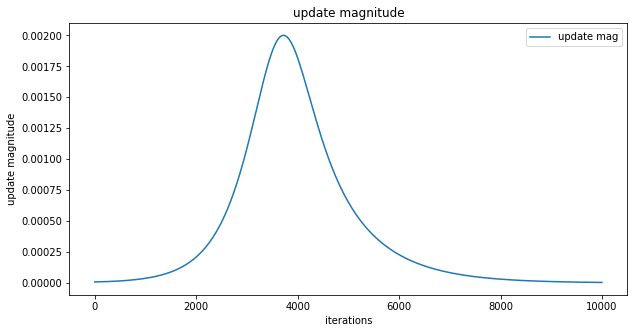

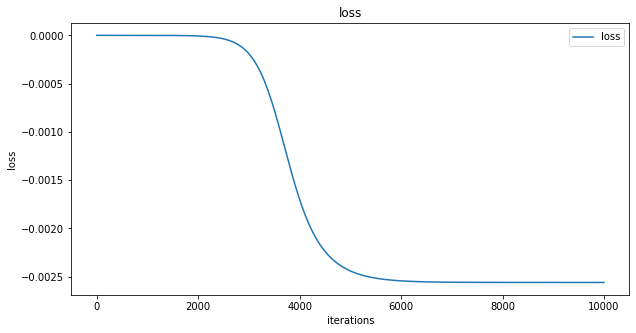

In [26]:
display.plot_diagnostic(diagnostic_hist)

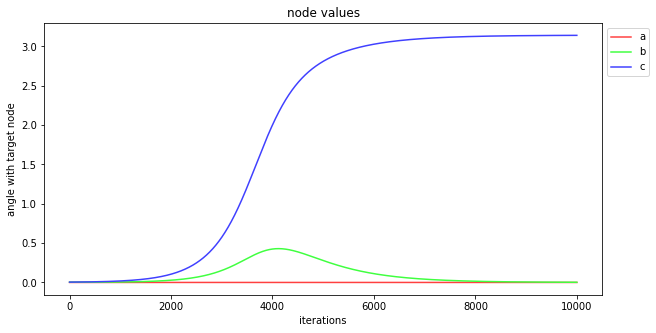

In [27]:
display.plot_history(hist, target="a")

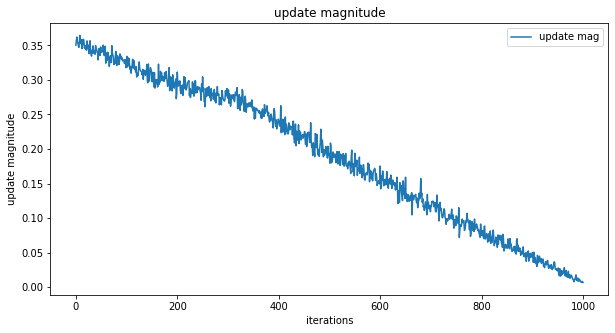

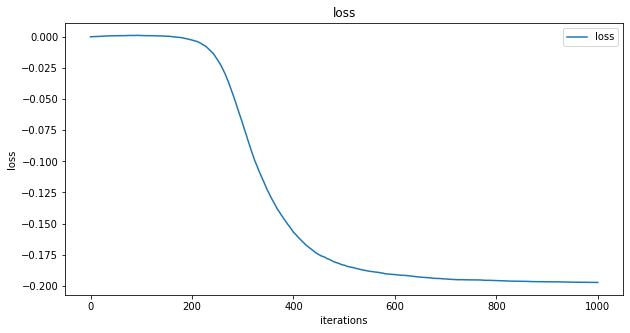

In [23]:
display.plot_diagnostic(diagnostic_hist)

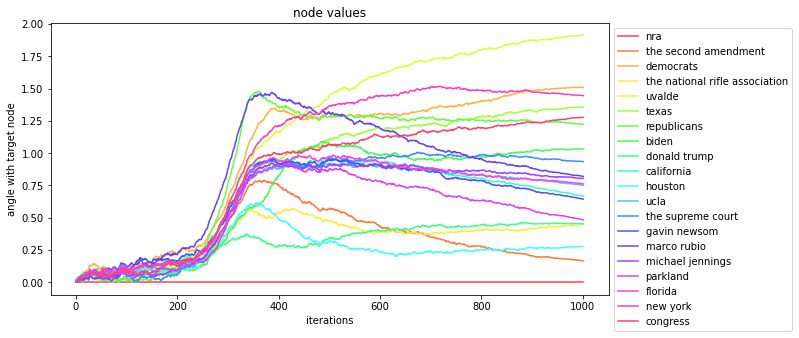

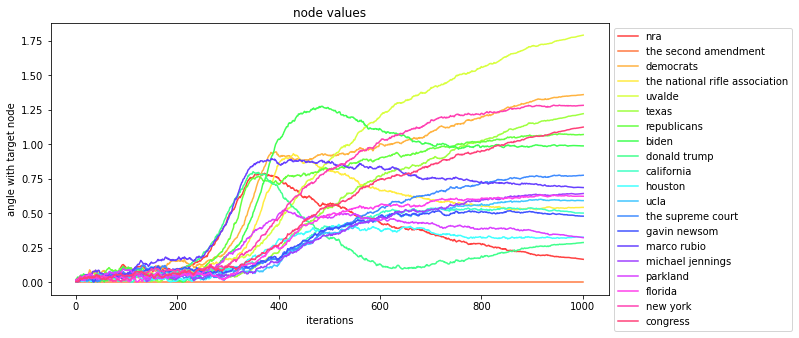

In [24]:
#display.plot_history(hist)
display.plot_history(hist, target="nra")
display.plot_history(hist, target="the second amendment")

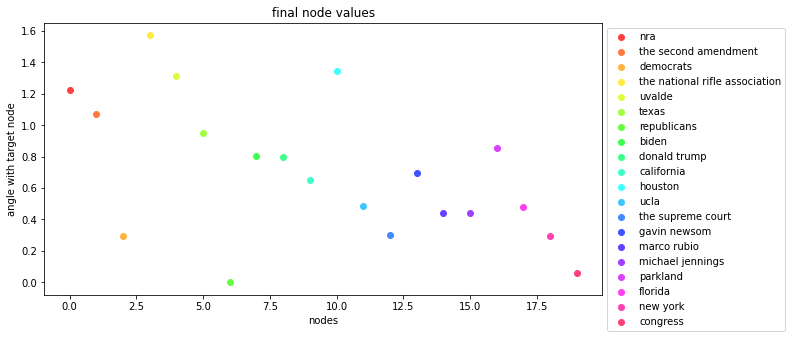

In [12]:
people = [
    "nra",
    "the second amendment",
    "democrats",
    "the national rifle association",
    "uvalde",
    "texas", 
    "republicans",
    "biden",
    "donald trump",
    "california",
    "houston",
    "ucla",
    "the supreme court",
    "gavin newsom",
    #"assault weapons",
    "marco rubio",
    #"childersberg",
    "michael jennings",
    "parkland",
    "florida",
    "new york",
    "congress",
    #"background checks",
    #"cnn",
    ] 
display.plot_final_values(g, people, target="republicans")


In [18]:
ppl = [
    "joe biden",
    "kamala harris",
    "thomas",
    "donald trump",
    "mark meadows",
    "supreme court",
    "neil gorsuch",
    "brett kavanaugh",
    "hillary clinton",
    "republicans",
    "democrat",
    "chuck schumer",
    "senate minority leader",
    "abortion",
    "jen psaki",
    "sanders",
    "texas heartbeat law",
    "obamacare",
    "alexandria ocasio-cortez",
    "roe v wade"
]
target = "roe v wade"
display.plot_final_values(g, ppl, target=target)

KeyError: 'value'

In [106]:
msg_passing.save_graph(g, "output/5K_lr_2_dim_10.graphml")
msg_passing.save_history(hist, diagnostic_hist, "output/5K_lr_2_dim_10.pkl")

In [60]:
fname = "input/Streamed_Datasets/gun_regulations_network.csv"
fname = "input/Streamed_Datasets/war_in_ukraine_network.csv"
df = pd.read_csv("input/Streamed_Datasets/gun_regulations_network.csv")
dates = list(set(df["publish_date"].fillna("")))
g = msg_passing.load_graph_csv(fname, with_dates=True)
print(utils.node_degrees(g)[:50])

[('ukraine', 521), ('russia', 257), ('ukrainian', 169), ('russian', 166), ('putin', 145), ('volodymyr zelensky', 140), ('vladimir putin', 123), ('kyiv', 89), ('russian forces', 77), ('zelensky', 76), ('kremlin', 73), ('moscow', 65), ('ukrainians', 48), ('boris johnson', 45), ('kherson', 40), ('nato', 38), ('zaporizhzhia', 36), ('yuri borisov', 36), ('russian troops', 35), ('crimea', 34), ("russia's invasion", 33), ('volodymyr zelenskyy', 32), ('ivan bakanov', 31), ('dmitry peskov', 31), ('russian president vladimir putin', 28), ('donetsk', 28), ('biden', 27), ('international space station', 27), ('erin mclaughlin', 27), ('donbas', 26), ('washington', 26), ('international atomic energy agency', 26), ("boris johnson's", 25), ('state', 24), ('turkey', 24), ("volodymyr zelensky's", 24), ('russian foreign ministry', 23), ('russian invasion', 23), ("vladimir putin's", 22), ('kharkiv', 22), ('vogue', 22), ('nbc news', 22), ('antony blinken', 21), ('maria zakharova', 20), ('british', 19), ('ja

FILE: 50K_lr_3_2022-09-24_00-00-00


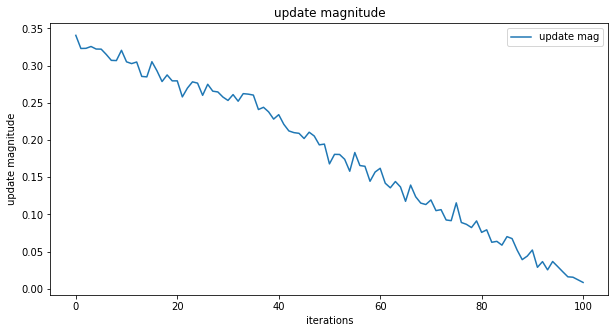

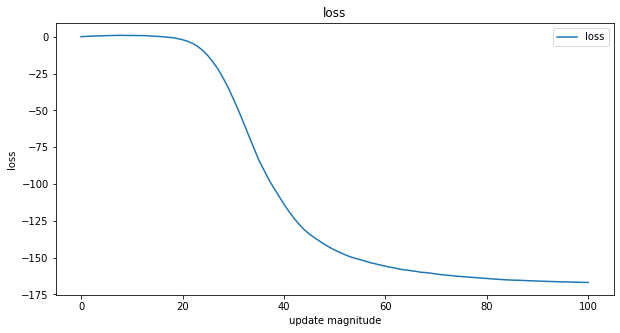

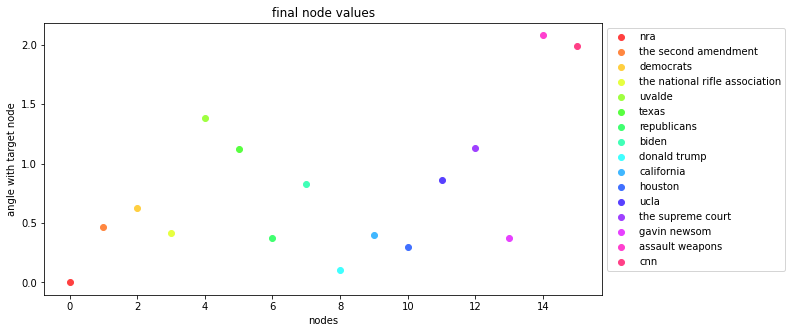

FILE: 50K_lr_3_2022-06-20_11-22-06.315789472


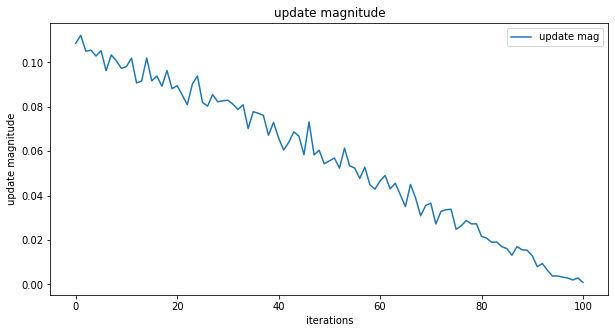

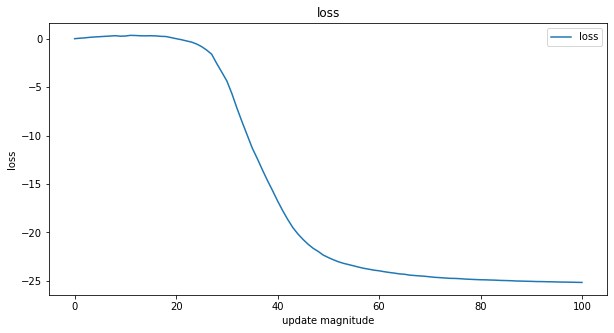

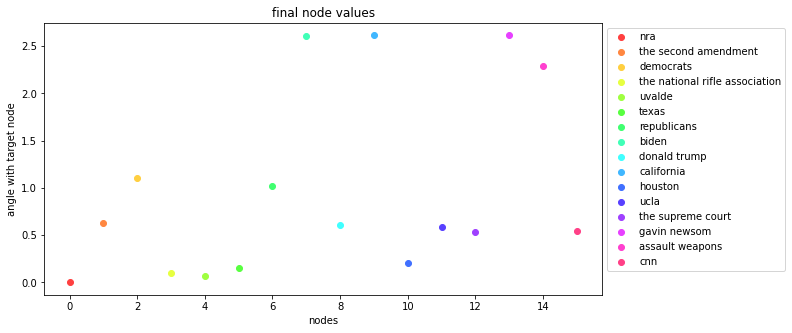

FILE: 50K_lr_3_2022-03-16_22-44-12.631578944


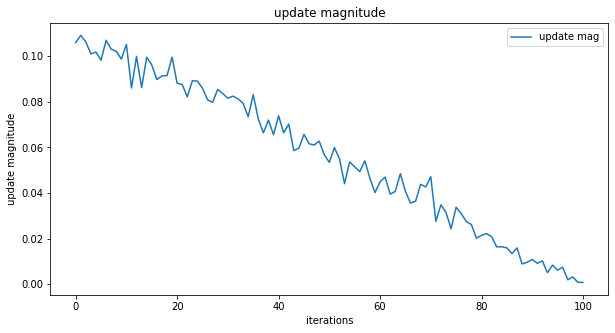

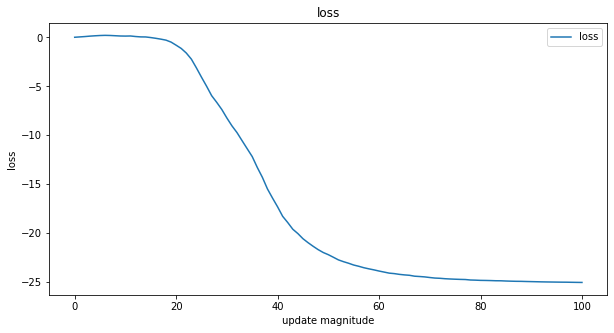

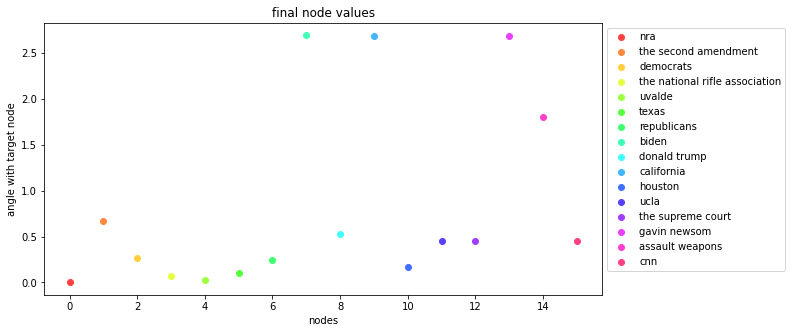

FILE: 50K_lr_3_2021-12-11_10-06-18.947368416


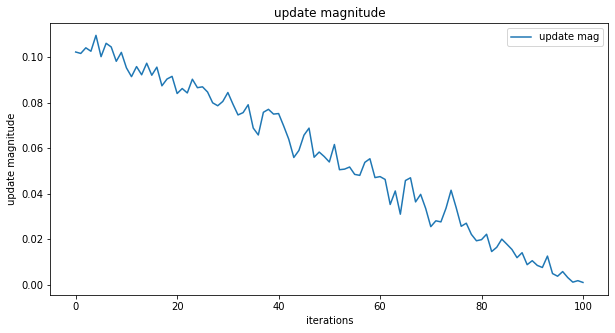

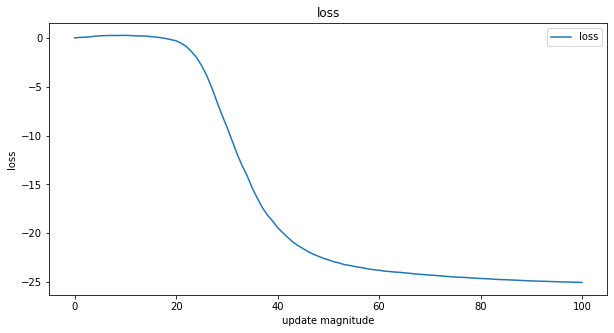

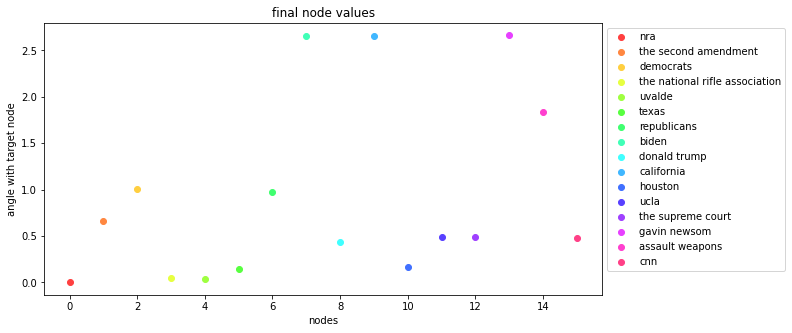

FILE: 50K_lr_3_2021-09-06_21-28-25.263157888


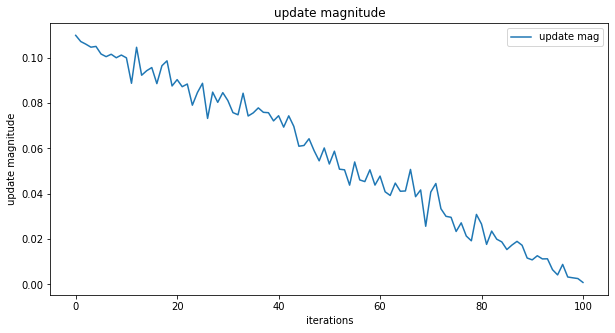

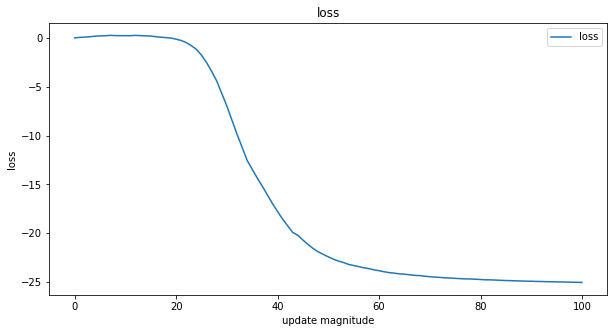

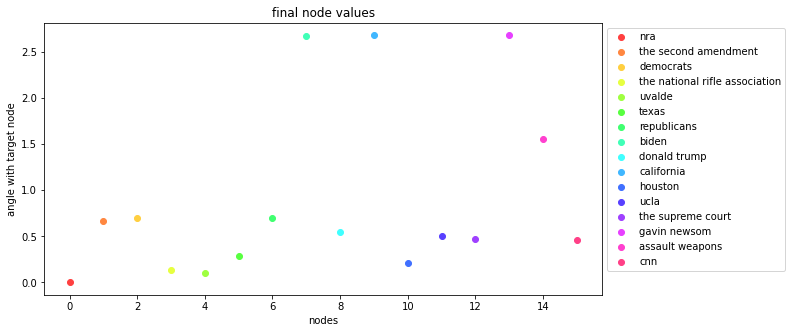

FILE: 50K_lr_3_2021-06-03_08-50-31.578947360


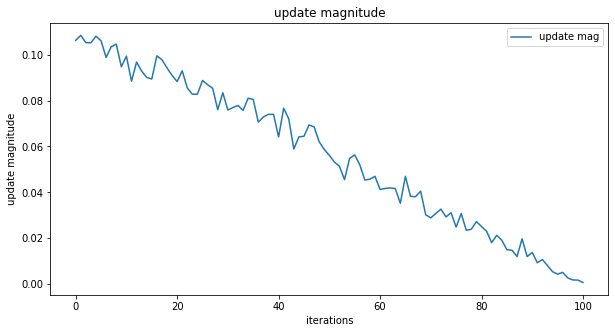

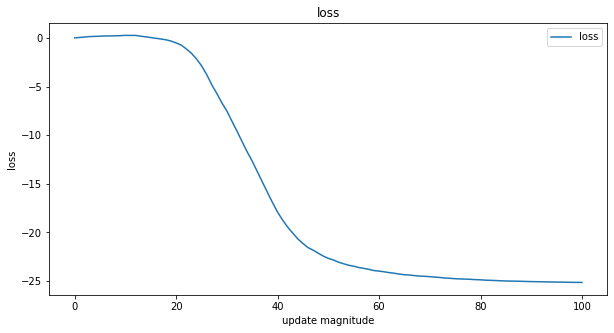

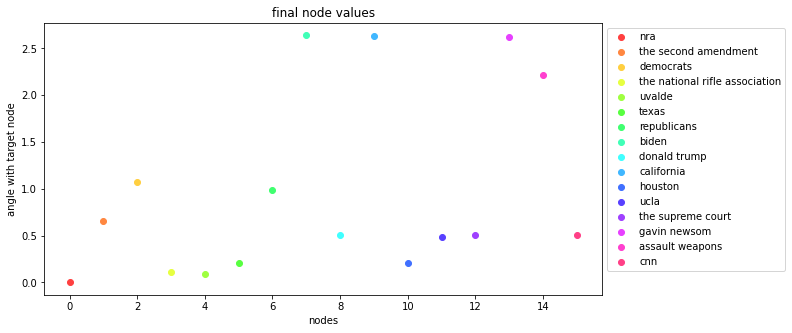

FILE: 50K_lr_3_2021-02-27_20-12-37.894736832


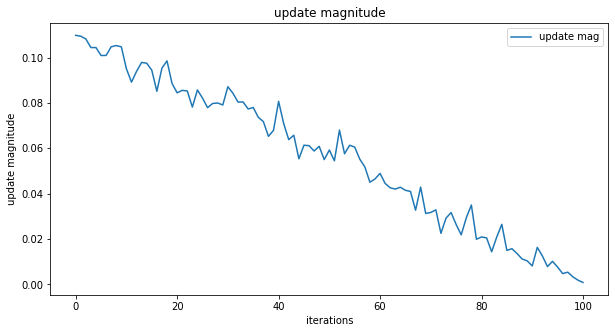

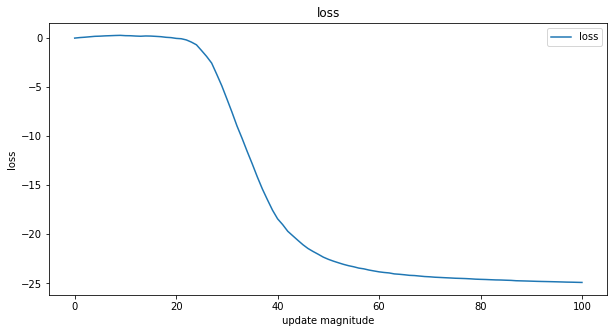

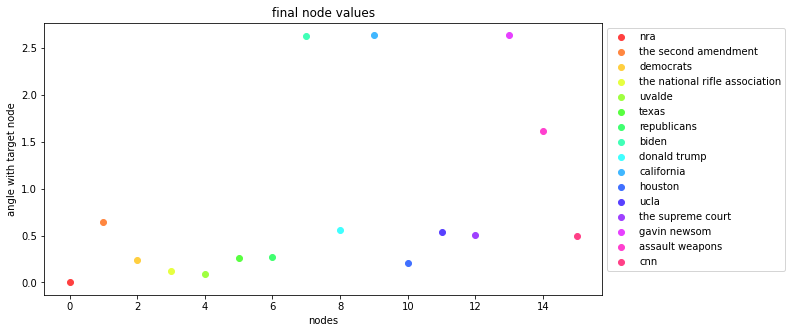

FILE: 50K_lr_3_2017-10-05_00-00-00


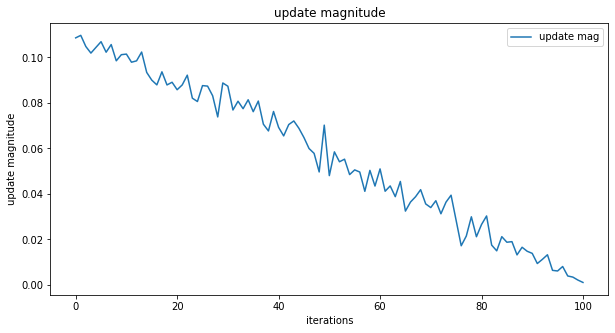

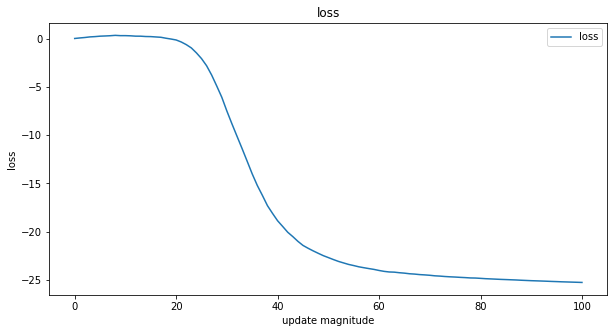

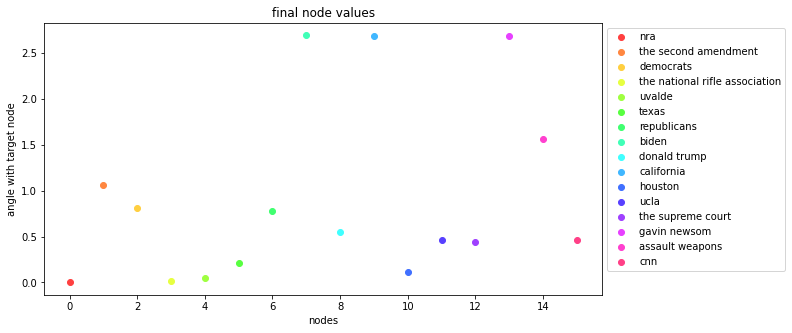

In [6]:
gun_nodes = [
    "nra",
    "the second amendment",
    "democrats",
    "the national rifle association",
    "uvalde",
    "texas", 
    "republicans",
    "biden",
    "donald trump",
    "california",
    "houston",
    "ucla",
    "the supreme court",
    "gavin newsom",
    "assault weapons",
    "cnn",
    "childersberg",
    
]
target = "nra"
files = [
    "50K_lr_3_2022-09-24_00-00-00",
    "50K_lr_3_2022-06-20_11-22-06.315789472",
    "50K_lr_3_2022-03-16_22-44-12.631578944",
    "50K_lr_3_2021-12-11_10-06-18.947368416",
    "50K_lr_3_2021-09-06_21-28-25.263157888",
    "50K_lr_3_2021-06-03_08-50-31.578947360",
    "50K_lr_3_2021-02-27_20-12-37.894736832",
    "50K_lr_3_2017-10-05_00-00-00"
]
prefix = "output/gun_regulations_50K/"
for f in files:
    print("FILE:", f)
    
    curr_g_file = prefix + f + ".graphml"
    curr_h_file = prefix + f + ".pkl"
    g = msg_passing.load_graph_graphml(curr_g_file)
    hist, diagnostic_hist = msg_passing.load_history(curr_h_file)
    #for s, t in g["assault weapons"].items():
    #    print(s, t)
    #break
    display.plot_diagnostic(diagnostic_hist)
    display.plot_final_values(g, gun_nodes, target=target)
    

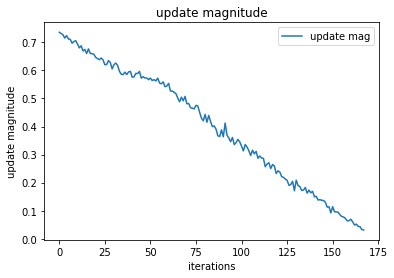

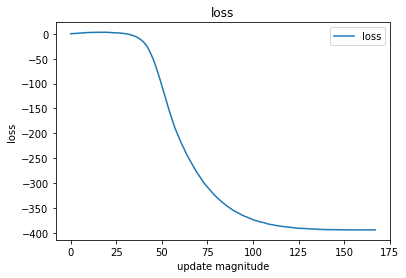

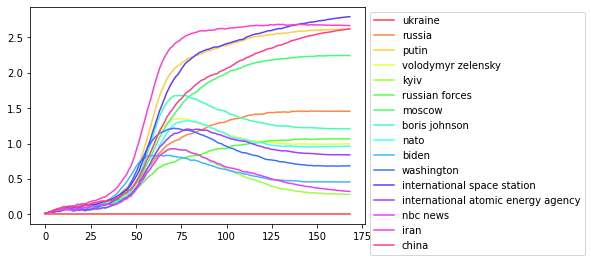

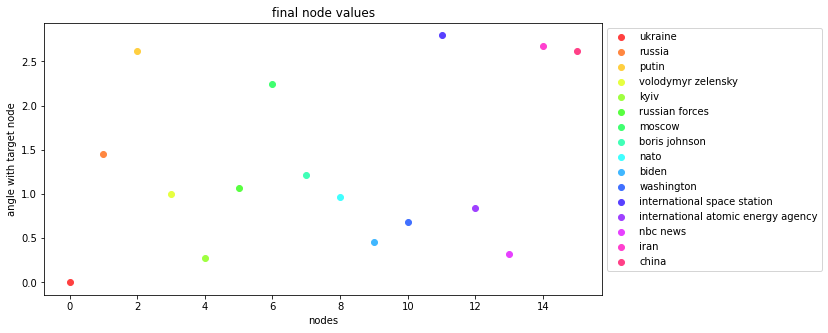

In [4]:
people_ukraine = [
        "ukraine",
        "russia",
        "putin",
        "volodymyr zelensky",
        "kyiv",
        "russian forces",
        "moscow",
        "boris johnson",
        "nato",
        "biden",
        "washington",
        "international space station",
        "international atomic energy agency",
        "nbc news",
        "iran",
        "china",
    ]    
target="ukraine" 
war_fname = "output/output/war_in_ukraine_50K_lr_3_dim_10.graphml"
war_fname_hist = "output/output/war_in_ukraine_50K_lr3_dim_10.pkl"

wg = msg_passing.load_graph_graphml(war_fname)
hist, diagnostic_hist = msg_passing.load_history(war_fname_hist)
display.plot_diagnostic(diagnostic_hist)
display.plot_history(hist, target=target)
display.plot_final_values(wg, people_ukraine, target)

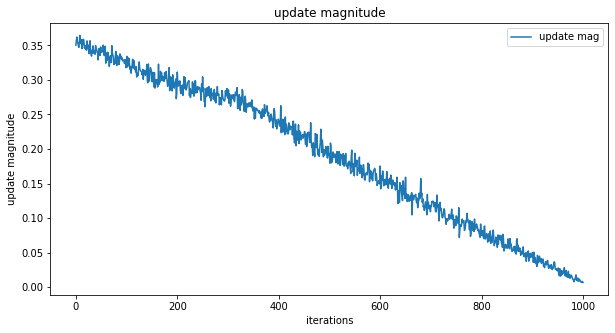

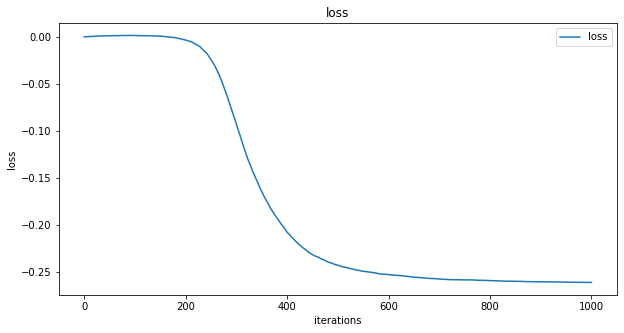

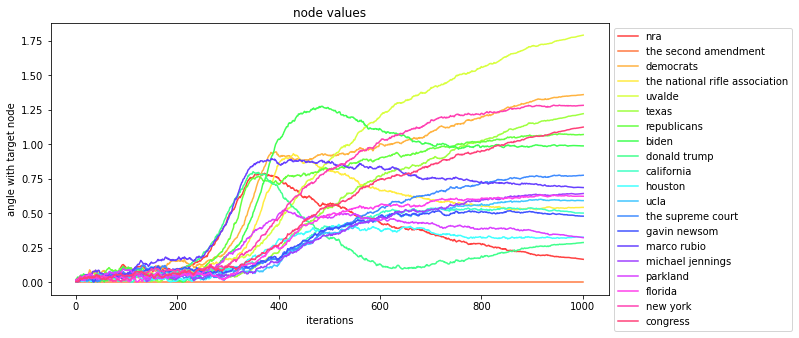

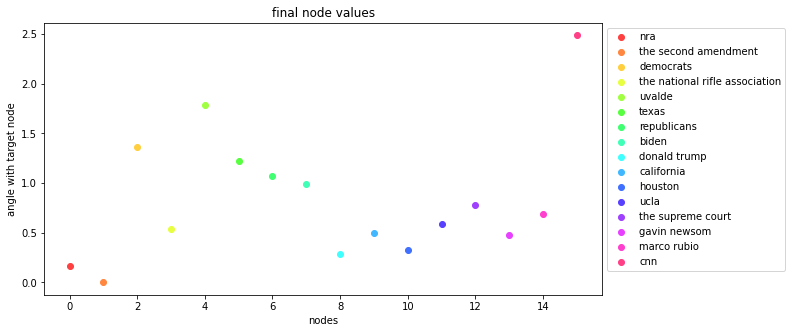

In [13]:
gun_nodes = [
    "nra",
    "the second amendment",
    "democrats",
    "the national rifle association",
    "uvalde",
    "texas", 
    "republicans",
    "biden",
    "donald trump",
    "california",
    "houston",
    "ucla",
    "the supreme court",
    "gavin newsom",
    #"assault weapons",
    "marco rubio",
    "cnn",
] 
target="the second amendment" 
#war_fname = "output/gun_regulations_v2_raw_answer_no_pruning_50K_lr_3_dim_10.graphml"
#war_fname_hist = "output/gun_regulations_v2_raw_answer_no_pruning_50K_lr_3_dim_10.pkl"
war_fname = "output/gun_regulations_v2_raw_answer_50K_lr_3_dim_10.graphml"
war_fname_hist = "output/gun_regulations_v2_raw_answer_50K_lr_3_dim_10.pkl"


wg = msg_passing.load_graph_graphml(war_fname)
hist, diagnostic_hist = msg_passing.load_history(war_fname_hist)
display.plot_diagnostic(diagnostic_hist)
display.plot_history(hist, target=target)
display.plot_final_values(wg, gun_nodes, target)

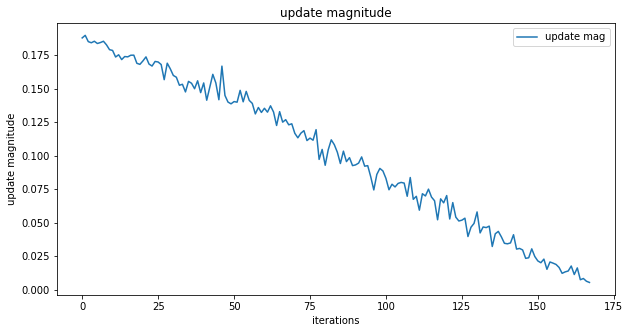

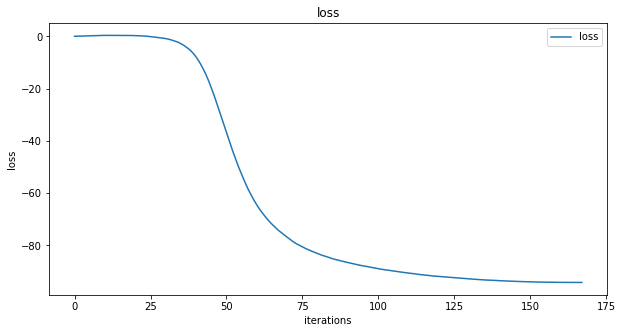

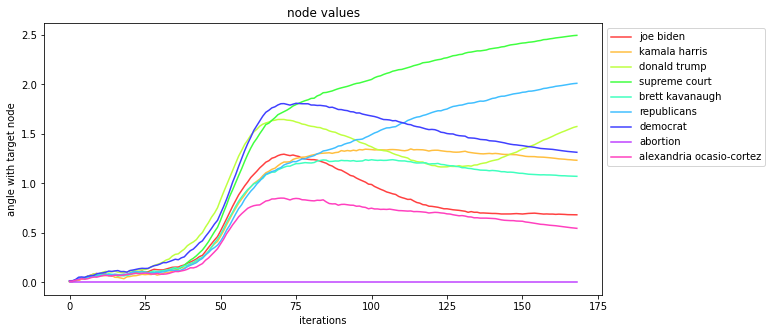

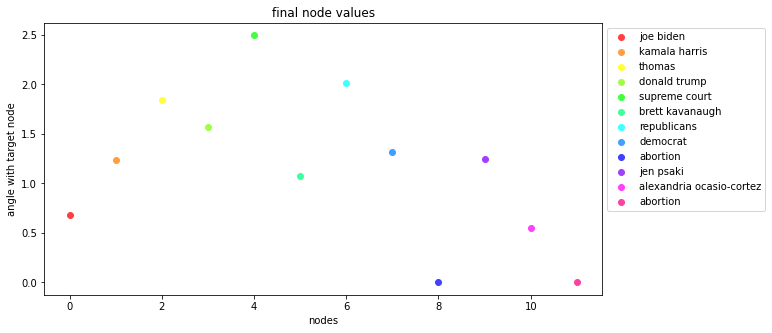

In [21]:
ppl = [
    "joe biden",
    "kamala harris",
    "thomas",
    "donald trump",
    #"mark meadows",
    "supreme court",
    #"neil gorsuch",
    "brett kavanaugh",
    #"hillary clinton",
    "republicans",
    "democrat",
    #"chuck schumer",
    #"senate minority leader",
    "abortion",
    "jen psaki",
    #"sanders",
    #"texas heartbeat law",
    #"obamacare",
    "alexandria ocasio-cortez",
    "abortion"
]
target="abortion" 
war_fname = "output/roe_v_wade_50K_lr_3_dim_10.graphml"
war_fname_hist = "output/roe_v_wade_50K_lr_3_dim_10.pkl"

wg = msg_passing.load_graph_graphml(war_fname)
hist, diagnostic_hist = msg_passing.load_history(war_fname_hist)
display.plot_diagnostic(diagnostic_hist)
display.plot_history(hist, target=target)
display.plot_final_values(wg, ppl, target)

In [5]:
infile = "input/Streamed_Datasets/gun_regulations_network.csv"
g = msg_passing.load_graph_csv(infile, with_dates=True)
#g = utils.largest_connected_component(g)
"""
msg_passing.initialize_node_values(g, mean=1, std=0.01, size=3)
msg_graph, aux_nodes = msg_passing.prune_graph(g)
print(msg_graph.nodes())
msg_passing.save_graph(msg_graph, "output/test.graphml")
"""
target = "marco rubio"
g = utils.ego_network(g, target)
print(g.edges(data=True))
"""
msg_passing.initialize_node_values(g, mean=1, std=0.01, size=10)
history = {}
for k, v in g[target].items():
    print(k)
    history[k] = []

print(g.nodes())

history, diagnostic_hist = msg_passing.pass_messages(g, 10**-3, 10**-3, 1000, print_period=100, stop_thresh=10**-8, use_heat=True, history=history, save_period=1)
"""
"""
num_pos = 0
num_neg = 0
for k, v in g[target].items():
    print(k, v)
    for e, vals in v.items():
        if(vals["weight"] > 0):
            num_pos += 1
        else:
            num_neg += 1
print(num_pos, num_neg)
"""

[('orlando', 'marco rubio', {'weight': 0.4, 'valence': 'Where was Marco Rubio located?', 'confidence': 13.747740745544435, 'publish_date': '2022-07-29 00:00:00'}), ('assault weapons', 'marco rubio', {'weight': -1.0, 'valence': 'Who or what did Marco Rubio oppose?', 'confidence': 10.54780387878418, 'publish_date': '2022-07-26 00:00:00'}), ('marco rubio', 'florida', {'weight': 0.4, 'valence': 'Where was Marco Rubio located?', 'confidence': 10.95418930053711, 'publish_date': '2022-07-26 00:00:00'}), ('marco rubio', 'cnn', {'weight': 0.4, 'valence': 'Where was Marco Rubio located?', 'confidence': 10.929949760437012, 'publish_date': '2022-08-08 13:00:06+00:00'})]


'\nnum_pos = 0\nnum_neg = 0\nfor k, v in g[target].items():\n    print(k, v)\n    for e, vals in v.items():\n        if(vals["weight"] > 0):\n            num_pos += 1\n        else:\n            num_neg += 1\nprint(num_pos, num_neg)\n'

In [5]:
infile = "input/Streamed_Datasets/gun_regulations_network.csv"
infile2 = "input/Streamed_Datasets_v2/gun_regulations_network.csv"
g = msg_passing.load_graph_csv(infile, with_dates=True)
g2 = msg_passing.load_graph_csv(infile2, with_dates=True)
msg_g, aux = msg_passing.prune_graph(g)
msg_g2, aux2 = msg_passing.prune_graph(g2)
print(len(msg_g.nodes()), len(aux), len(msg_g.nodes()) / len(g.nodes()))
print(len(msg_g2.nodes()), len(aux2), len(msg_g2.nodes()) / len(g2.nodes())

577 3271 0.14994802494802495
781 4443 0.14950229709035223


In [19]:
infile = "input/Streamed_Datasets_v2/gun_regulations_network.csv"
g = msg_passing.load_graph_csv(infile, with_dates=True)

def print_neighbors(g, target):
    for k, v in g[target].items():
        for k2, v2 in v.items():
            data = {"weight": v2["weight"], "valence": v2["valence"]}
            print(f"({target}, {k}): edge data:", data)

print_neighbors(g, "the second amendment")

(the second amendment, desantis): edge data: {'weight': 0.8, 'valence': 'What was DeSantis used for?'}
(the second amendment, a registered handgun): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, a registered handgun): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, a registered handgun): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, the individual personal right): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, the individual personal right): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, the individual personal right): edge data: {'weight': 1.0, 'valence': 'What did the Second Amendment enforce?'}
(the second amendment, individual personal right): edge data: {'weight': 1.0, 'valence': 'Who or what did the Seco

In [24]:
infile = "input/Streamed_Datasets_v2/gun_regulations_network.csv"
df = pd.read_csv(infile)
for i, row in df.iterrows():
    print("source:", row["from_node"], "target:", row["to_node"], "raw:", row["raw_answer"])
    if(i+1 % 100 == 0):
        break

source: MCX Spear target: body armor raw: punch through body armor at range
source: the Dulles Expo Center target: showmaster gun show raw: Showmaster Gun show
source: Ron Cohen target: sig sauer raw: Sig Sauer
source: MCX Spear target: the toughest body armor raw: pierce through all but the toughest body armor
source: AR-15s target: america’s foreign enemies raw: America’s foreign enemies
source: MCX Spear target: ar platform raw: AR platform
source: Cohen target: mcx spear raw: MCX Spear
source: John Connally target: latin america raw: Latin America
source: John Connally target: austin raw: Austin
source: Kosuke Okahara— target: —bloomberg raw: —Bloomberg
source: Japanese target: liberal democratic party raw: Liberal Democratic Party
source: Shinzo Abe target: liberal democratic party raw: Liberal Democratic Party
source: Shinzo Abe target: japan raw: Nara, Japan
source: Alison Young target: university raw: University of Melbourne
source: Alison Young target: japanese governance raw:

In [15]:
infile = "input/Streamed_Datasets_v2/gun_regulations_network.csv"
g = msg_passing.load_graph_csv(infile, with_dates=False, minimal_answer=True)
g = utils.largest_connected_component(g)
print(len(g.nodes()))

pg, aux = msg_passing.prune_graph(g)
print(len(pg.nodes()))

print(utils.node_degrees(pg))

914
244
[('nra', 50), ('democrats', 29), ('the national rifle association', 29), ('houston', 25), ('texas', 20), ('national rifle association', 18), ('republicans', 16), ('florida', 16), ('the nra', 16), ('ron desantis', 13), ('republican', 12), ('greg abbott', 11), ('lars dalseide', 11), ('moab', 11), ('donald trump', 11), ('gavin newsom', 10), ('california', 10), ('new york', 10), ('ted cruz', 9), ('scott meyer', 9), ("the national rifle association's", 8), ('maine', 8), ('pennsylvania', 8), ('hondo', 8), ('jared golden', 8), ('philadelphia', 7), ('wayne lapierre', 7), ('congress', 7), ('biden', 7), ('denver', 7), ('the second amendment', 7), ('oregon', 6), ('kathy hochul', 6), ('joe biden', 6), ('kurt schrader', 6), ('nikki fried', 6), ('quezon city', 6), ('utah', 6), ('chris jacobs', 5), ('mendez', 5), ('beth mccann', 5), ('the bipartisan safer communities act', 5), ("daniel defense's", 5), ('mitt romney', 5), ('house', 5), ('agriculture', 5), ('daniel defense', 5), ('democratic', 